In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, risk_models, expected_returns
from pypfopt import plotting


In [4]:
# --- 1. Load Data ---

prices = pd.read_csv('../data/processed_data.csv', index_col='Date', parse_dates=True)

In [5]:
# --- 2. Prepare Inputs for Optimization ---

# --- Ingredient A: Expected Returns ---
mu_historical = expected_returns.mean_historical_return(prices, frequency=252)

last_known_tsla_price = prices['TSLA'][-1]
forecasted_tsla_price = 350.0 # <<< REPLACE WITH YOUR ACTUAL FORECASTED PRICE

forecast_days = 189
tsla_annualized_return = ((forecasted_tsla_price / last_known_tsla_price)**(252 / forecast_days)) - 1

mu = mu_historical.copy()
mu['TSLA'] = tsla_annualized_return

print("--- Inputs for Optimization ---")
print("Annualized Expected Returns:")
print(mu)
print("-" * 30)

# --- Ingredient B: Covariance Matrix ---

S = risk_models.sample_cov(prices, frequency=252)

print("Annual Sample Covariance Matrix:")
print(S)
print("-" * 30)

--- Inputs for Optimization ---
Annualized Expected Returns:
BND     0.018252
SPY     0.136706
TSLA    0.131437
dtype: float64
------------------------------
Annual Sample Covariance Matrix:
           BND       SPY      TSLA
BND   0.003016  0.001150  0.001861
SPY   0.001150  0.033272  0.052950
TSLA  0.001861  0.052950  0.350331
------------------------------


C:\Users\Bisrat\AppData\Local\Temp\ipykernel_14740\1892637820.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_known_tsla_price = prices['TSLA'][-1]


In [6]:
# --- 3. Perform the Optimization ---


ef = EfficientFrontier(mu, S)

# Find the portfolio that has the maximum Sharpe Ratio (best risk-adjusted return)
weights_max_sharpe = ef.max_sharpe()
cleaned_weights_max_sharpe = ef.clean_weights() # Cleans up tiny values
print("\n--- Optimal Portfolio (Maximum Sharpe Ratio) ---")
print(cleaned_weights_max_sharpe)
ef.portfolio_performance(verbose=True)
print("-" * 30)


ef_min_vol = EfficientFrontier(mu, S)
weights_min_vol = ef_min_vol.min_volatility()
cleaned_weights_min_vol = ef_min_vol.clean_weights()
print("\n--- Optimal Portfolio (Minimum Volatility) ---")
print(cleaned_weights_min_vol)
ef_min_vol.portfolio_performance(verbose=True)
print("-" * 30)



--- Optimal Portfolio (Maximum Sharpe Ratio) ---
OrderedDict({'BND': 0.53489, 'SPY': 0.46511, 'TSLA': 0.0})
Expected annual return: 7.3%
Annual volatility: 9.3%
Sharpe Ratio: 0.79
------------------------------

--- Optimal Portfolio (Minimum Volatility) ---
OrderedDict({'BND': 0.94511, 'SPY': 0.05489, 'TSLA': 0.0})
Expected annual return: 2.5%
Annual volatility: 5.4%
Sharpe Ratio: 0.46
------------------------------



Visualizing the Efficient Frontier...


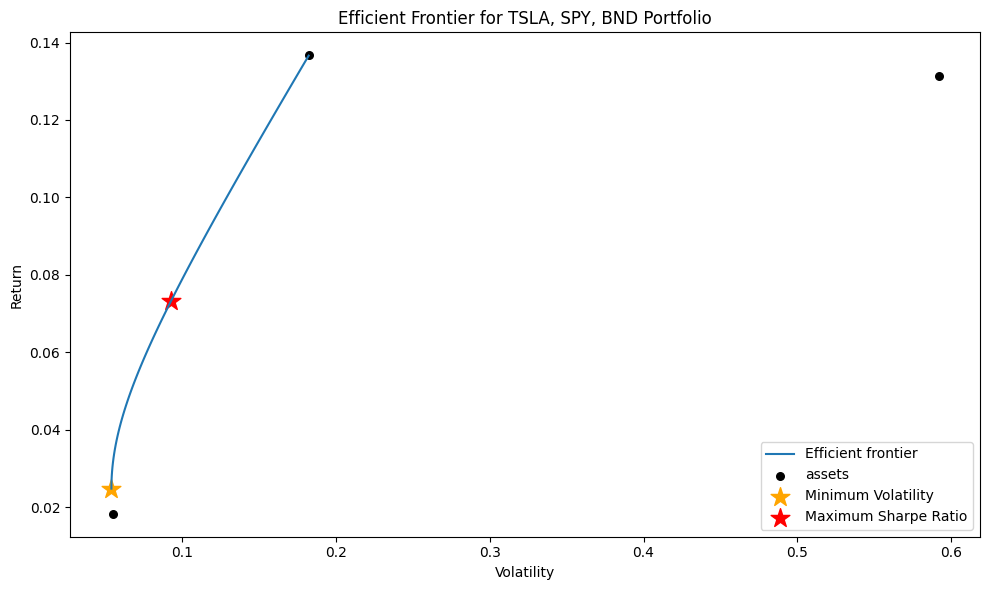

In [8]:
print("\nVisualizing the Efficient Frontier...")

max_sharpe_perf = ef.portfolio_performance(verbose=False)
min_vol_perf = ef_min_vol.portfolio_performance(verbose=False)

ef_for_plotting = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize=(10, 6))
plotting.plot_efficient_frontier(ef_for_plotting, ax=ax, show_assets=True)


ax.scatter(min_vol_perf[1], min_vol_perf[0], marker='*', s=200, c='orange', label='Minimum Volatility')
ax.scatter(max_sharpe_perf[1], max_sharpe_perf[0], marker='*', s=200, c='red', label='Maximum Sharpe Ratio')

ax.set_title('Efficient Frontier for TSLA, SPY, BND Portfolio')
ax.legend()
plt.tight_layout()
plt.show()